In [1]:
!pip install matplotlib

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [7]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
measurement = Base.classes.measurement

In [10]:
measurement

sqlalchemy.ext.automap.measurement

In [11]:
station = Base.classes.station

In [12]:
station

sqlalchemy.ext.automap.station

In [13]:
session = Session(engine)

In [14]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis 

In [17]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [18]:
#convert most recet date into date format
most_recent_date = dt.date(2017,8,23)-dt.timedelta(days = 365)
print(most_recent_date)

2016-08-23


In [19]:
year_percipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= most_recent_date, measurement.prcp != None).\
    order_by(measurement.date).all()

In [20]:
# convert percipitation data into df
percip_df = pd.DataFrame(year_percipitation, columns = ['Date','Percipitation'])
percip_df.set_index('Date', inplace = True)
percip_df.head()

,Percipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


<AxesSubplot:xlabel='Date'>

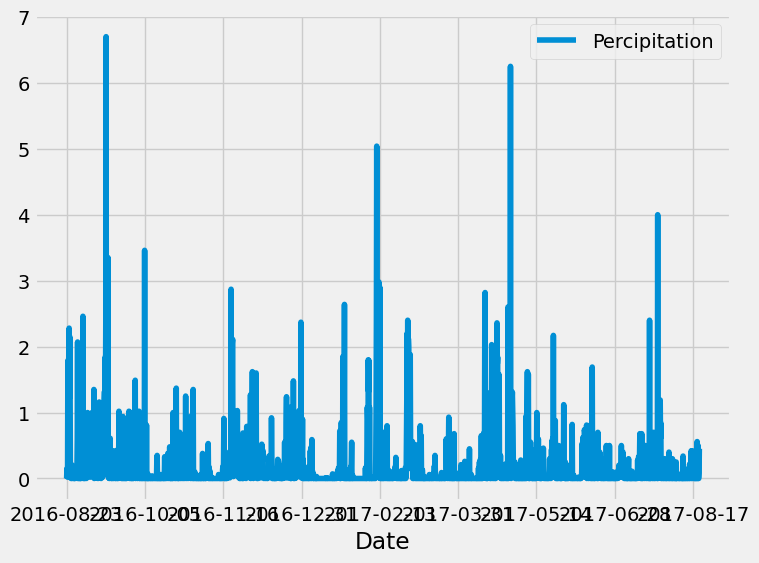

In [21]:
# plot data 
percip_df.plot (figsize = (8,6))

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
percip_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#Exploratory Station Analysis 

In [26]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).group_by(measurement.station).count()

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station,func.count(measurement.station)).\
                               group_by(measurement.station).\
                               order_by(func.count(measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_high_avg_temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
low_high_avg_temp

[(54.0, 85.0, 71.66378066378067)]

In [34]:
year_temp = session.query(measurement.tobs).\
      filter(measurement.date >= most_recent_date, measurement.station == 'USC00519281').\
      order_by(measurement.tobs).all()

In [35]:
# Create DF to get ready to plot
temp_observation_df = pd.DataFrame(year_temp, columns = ['Tobs'])
temp_observation_df

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
347,81.0
348,82.0
349,82.0
350,82.0


(0.0, 80.0)

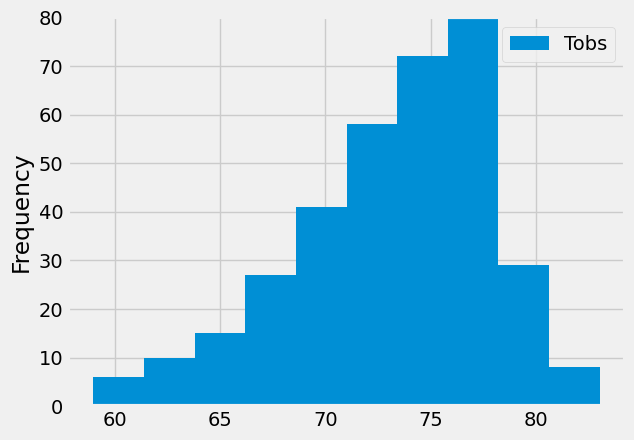

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
bins = 12
temp_observation_df.plot.hist(year_temp)
plt.ylim(0,80)

# Close Session 

In [40]:
session.close

<bound method Session.close of <sqlalchemy.orm.session.Session object at 0x7fd2990fc6d0>>

In [41]:
session.query(measurement.station).group_by(measurement.station).count()

9